# Image Preprocessing
* Perform cropping to ROi
* Perform colour extraction
* Saving to preprocessed directory

In [1]:
# import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys


# for waveform analysis
TEST_DATASET_PATH = "E:\\Data\\TestSet\\"
TEST_CATEGORIES = ['OverSaturated', 'UnderSaturated', 'JustSaturated']

MODEL_PATH = 'E:\\Model\\'
CNN_PREPROCESSING_BUFFER_PATH = 'E:\\Data\\PreprocessingBuffer\\'
FAILED_TESTCASES_PATH = "E:\\Data\\Failed Testset\\"
CROPPED_DATASET_PATH = 'E:\\Data\\LargeSet\\Cropped\\'

OVERSATURATED_DATASET_PATH = 'E:\\Data\\LargeSet\\OverSaturated'
UNDERSATURATED_DATASET_PATH = 'E:\\Data\\LargeSet\\UnderSaturated'
JUSTSATURATED_DATASET_PATH = 'E:\\Data\\LargeSet\\JustSaturated'

OVERSATURATED_CROPPED_DATASET_PATH = 'E:\\Data\\LargeSet\\Cropped\\OverSaturated'
UNDERSATURATED_CROPPED_DATASET_PATH = 'E:\\Data\\LargeSet\\Cropped\\UnderSaturated'
JUSTSATURATED_CROPPED_DATASET_PATH = 'E:\\Data\\LargeSet\\Cropped\\JustSaturated'



In [2]:


# path to image folder
overSaturated_image_dir = OVERSATURATED_DATASET_PATH
justSaturated_image_dir = JUSTSATURATED_DATASET_PATH
underSaturated_image_dir = UNDERSATURATED_DATASET_PATH

# path to cropped image folder
overSaturated_cropped_dir = OVERSATURATED_CROPPED_DATASET_PATH
justSaturated_cropped_dir = JUSTSATURATED_CROPPED_DATASET_PATH
underSaturated_cropped_dir = UNDERSATURATED_CROPPED_DATASET_PATH

# create directories if they don't exist
if not os.path.exists(overSaturated_cropped_dir):
    os.makedirs(overSaturated_cropped_dir)

if not os.path.exists(justSaturated_cropped_dir):
    os.makedirs(justSaturated_cropped_dir)

if not os.path.exists(underSaturated_cropped_dir):
    os.makedirs(underSaturated_cropped_dir)


In [3]:
# Region of Interest (ROI) coordinates
x_start, x_end, y_start, y_end = 600, 1270, 60, 300

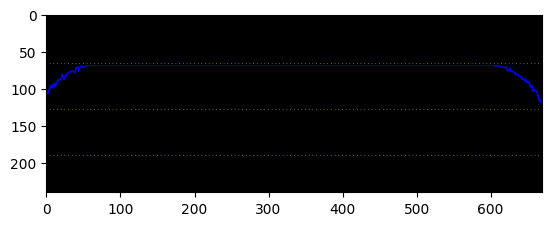

In [4]:
# open a image for previewing
img = cv2.imread(os.path.join(overSaturated_image_dir, 'overSaturated0.bmp.bmp'))

# Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# crop the image
img_cropped = img[y_start:y_end, x_start:x_end]

# show the image
plt.imshow(img_cropped)
plt.show()

In [5]:
# read all the images in the JustSaturated folder
for file in os.listdir(justSaturated_image_dir):
    # read the image
    img = cv2.imread(os.path.join(justSaturated_image_dir, file))

    # crop the image to ROI
    img_cropped = img[y_start:y_end, x_start:x_end]

    # save the image with original file name
    cv2.imwrite(os.path.join(justSaturated_cropped_dir, file), img_cropped)


In [6]:
# read all the images in the OverSaturated folder
for i, file in enumerate(os.listdir(overSaturated_image_dir)):
    # read the image
    img = cv2.imread(os.path.join(overSaturated_image_dir, file))

    # crop the image to ROI
    img_cropped = img[y_start:y_end, x_start:x_end]

    # save the image
    cv2.imwrite(os.path.join(overSaturated_cropped_dir, file), img_cropped)

In [7]:
# read all the images in the UnderSaturated folder
for i, file in enumerate(os.listdir(underSaturated_image_dir)):
    # read the image
    img = cv2.imread(os.path.join(underSaturated_image_dir, file))

    # crop the image to ROI
    img_cropped = img[y_start:y_end, x_start:x_end]

    # save the image
    cv2.imwrite(os.path.join(underSaturated_cropped_dir, file), img_cropped)

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import sys

# Define the path to the main directory
main_dir = "E:\\RDI Dataset\\"
oversaturate_dir = "E:\\RDI Dataset\\Oversaturated"
undersaturate_dir = "E:\\RDI Dataset\\Undersaturated"
justsaturated_dir = "E:\\RDI Dataset\\JustSaturated"

# Region of Interest (ROI) coordinates
x_start, x_end, y_start, y_end = 600, 1270, 60, 300

# Function to handle cropping
def handle_cropping(image_dir, target_dir):
    # Check if the cropped directory exists, if not, create it
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
        
    # Process each image file in the image directory
    for file in os.listdir(image_dir):
        # Check if the file is an image
        if file.endswith(".bmp") or file.endswith(".jpg") or file.endswith(".png"):
            # Read the image
            img = cv2.imread(os.path.join(image_dir, file))
            
            # Crop the image to the ROI
            img_cropped = img[y_start:y_end, x_start:x_end]
            
            # Save the cropped image in the cropped directory
            cv2.imwrite(os.path.join(target_dir, file), img_cropped)

            print("Cropped image " + file + " to " + target_dir)

def main():
    # Loop through each subdirectory in the main directory
    for subdir in os.listdir(main_dir):
        subdir_path = os.path.join(main_dir, subdir)

        # Check if the path is a directory
        if os.path.isdir(subdir_path):
            # Define the paths to the image directory and the cropped directory
            image_dir = subdir_path

            # Determine the target directory based on the subdirectory name
            if "Light Level" in subdir:
                light_level = int(subdir.split(" ")[-1])
                if light_level <= 35:
                    #target_dir = undersaturate_dir
                    # Handle the cropping for this directory
                    #handle_cropping(image_dir, target_dir)
                    pass
                elif light_level <= 38:
                    #target_dir = justsaturated_dir
                    # Handle the cropping for this directory
                    #handle_cropping(image_dir, target_dir)
                    pass
                else:
                    target_dir = oversaturate_dir
                    handle_cropping(image_dir, target_dir)
            else:
                pass

            

if __name__ == "__main__":
    main()


Cropped image light_level_39_1.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_2.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_3.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_4.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_5.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_6.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_7.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_8.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_9.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_10.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_11.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_12.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_13.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_14.bmp to E:\RDI Dataset\Oversaturated
Cropped image light_level_39_15.bmp to E:\RDI Dataset\Ove

KeyboardInterrupt: 